In [1]:
import os
from utils import data_reader, custom_functions, plot_utils
import scipy.io
from ggplot import *
import pandas as pd
import numpy as np
from math import *
from scipy.signal import argrelextrema
import matplotlib.pyplot as plt


/home/hmvergara/anaconda3/lib/python3.5/site-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
/home/hmvergara/anaconda3/lib/python3.5/site-packages/ggplot/stats/smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
/home/hmvergara/anaconda3/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
# Test data:
'''
GenPath = os.getcwd()
Data_path = GenPath + '/data/'
Data_file = '2018-10-25_1_Mario_Block.mat'
'''

date = '2018-11-01'
session = '4'

Data_path = '/mnt/c/Users/herny/Desktop/SWC/Data/Behavioural_Data/Mario/'+date+'/'+session+'/'
Data_file = date+'_'+session+'_Mario_Block.mat'

Data_Dict = data_reader.mat_parser(Data_path + Data_file)


In [3]:
Data_Dict.keys()

dict_keys(['Moving_az', 'Licks', 'Trial_side', 'Target_reached', 'Main_name', 'Wrong_reached'])

In [4]:
# Get data from the licks
LickMaximaIndex = argrelextrema(np.array(Data_Dict['Licks']['lickValues']), np.greater)
# Define a threshold for the lick
LickThreshold = 6
#Select those maxima above that threshold
LickEvents = Data_Dict['Licks'].iloc[LickMaximaIndex]['lickTimes'][Data_Dict['Licks'].iloc[LickMaximaIndex]['lickValues']>LickThreshold]
# Add it to the dictionary
Data_Dict["Lick_events"] = LickEvents

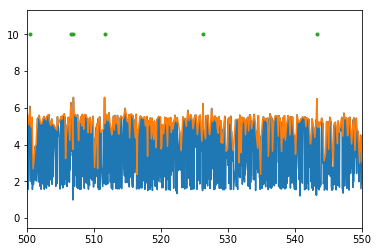

In [5]:
# Test the threshold for the licking
plt.plot( 'lickTimes', 'lickValues', data = Data_Dict['Licks'])
plt.plot( 'lickTimes', 'lickValues', data = Data_Dict['Licks'].iloc[LickMaximaIndex])
plt.plot(Data_Dict["Lick_events"],len(Data_Dict["Lick_events"]) * [10],'.')
# plot_utils.axvlines(Data_Dict["Lick_events"])
plt.xlim(500, 550)
plt.show()

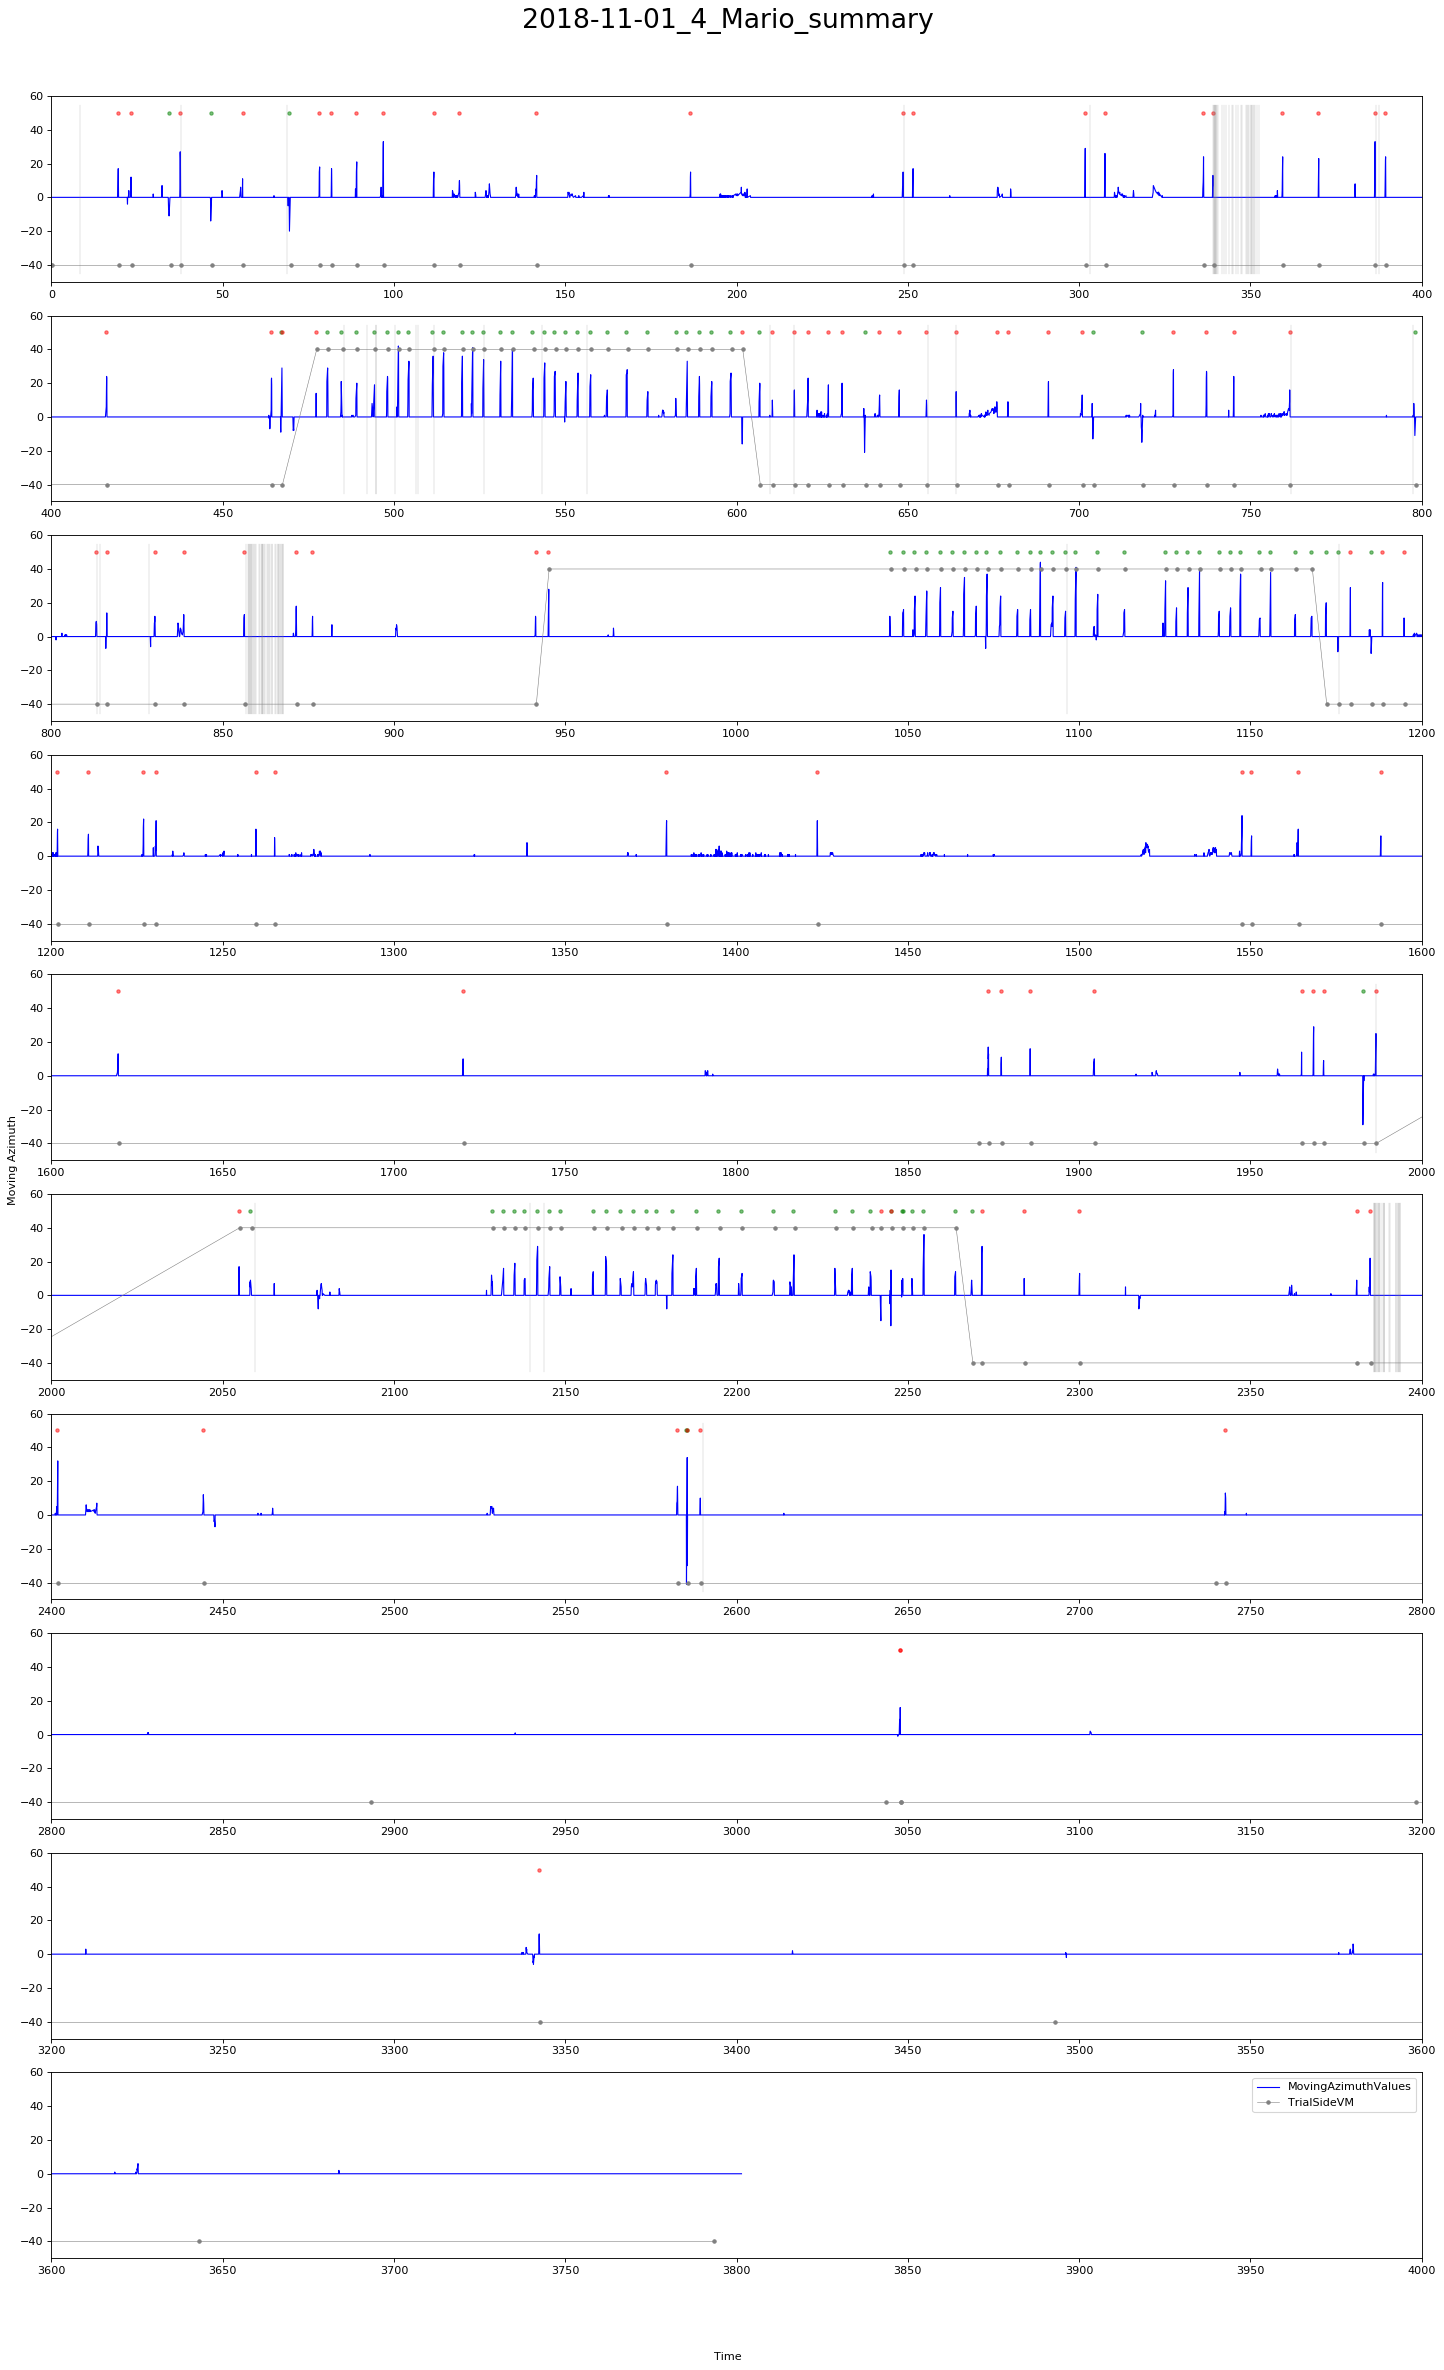

In [6]:
# Generate a summary figure
Summary_figure = plot_utils.summary_figure(Data_Dict,400)
plt.show(Summary_figure)

# Include the joystick movement! 
# Clip the dataset

In [7]:
# fig.savefig('plots/'+Main_name+'_summary.pdf', transparent=True)

In [8]:
len(Data_Dict['Target_reached'])/len(Data_Dict['Wrong_reached'])

1.0736842105263158